In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

df_2014 = pd.read_csv('C:/Users/wccr7/OneDrive - SCL/Desktop/Datasets/2014-15.csv')
df_2015 = pd.read_csv('C:/Users/wccr7/OneDrive - SCL/Desktop/Datasets/2015-16.csv')
df_2016 = pd.read_csv('C:/Users/wccr7/OneDrive - SCL/Desktop/Datasets/2016-17.csv')
df_2017 = pd.read_csv('C:/Users/wccr7/OneDrive - SCL/Desktop/Datasets/2017-18.csv')
df_2018 = pd.read_csv('C:/Users/wccr7/OneDrive - SCL/Desktop/Datasets/2018-19.csv')
df_2014['Season'] = '2014/15'
df_2015['Season'] = '2015/16'
df_2016['Season'] = '2016/17'
df_2017['Season'] = '2017/18'
df_2018['Season'] = '2018/19'
training = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], ignore_index=True)
columns_to_drop = ['Date','Div', 'Referee', 'HTHG', 'HTAG']
training = training.drop(columns=columns_to_drop)
X = training.drop(columns=['FTHG', 'FTAG', 'FTR'])
Y = training['FTR']
X = pd.get_dummies(X, columns=['HomeTeam', 'AwayTeam', 'Season', 'HTR'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 100)
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

score = accuracy_score(Y_test, predictions)
score

0.5654761904761905

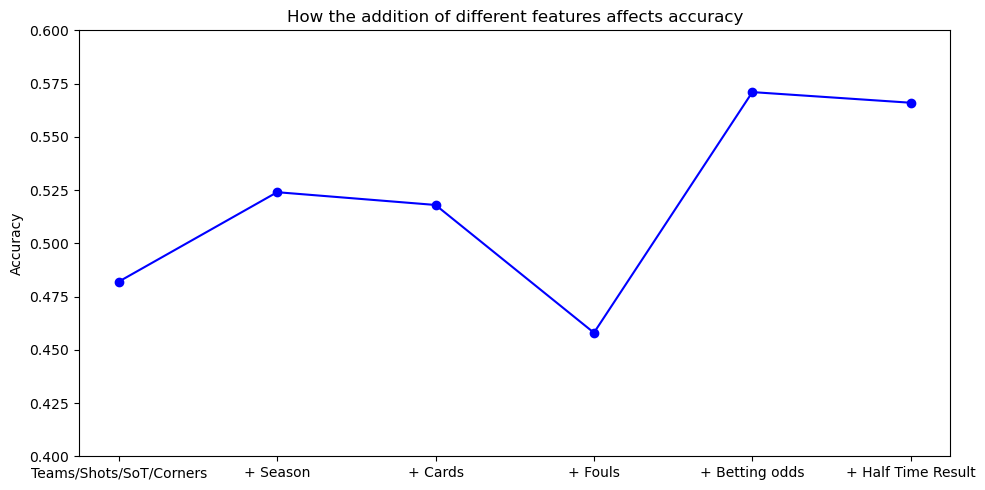

In [107]:
features = ['Teams/Shots/SoT/Corners', '+ Season', '+ Cards', '+ Fouls', '+ Betting odds', '+ Half Time Result']
accuracy = [0.482, 0.524, 0.518, 0.458, 0.571, 0.566]
plt.figure(figsize=(10, 5))
plt.plot(features, accuracy, marker='o', linestyle = '-', color='blue')
plt.ylabel('Accuracy')
plt.grid = True
plt.ylim(0.4, 0.6)
plt.title('How the addition of different features affects accuracy')
plt.tight_layout()